In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hero_duel_all_data.csv to hero_duel_all_data.csv


In [4]:
df = pd.read_csv('hero_duel_all_data.csv')
df.head()

,Game_ID,Turn_Number,Timestamp,Player_ID,Action_Chosen,Player_Level,Player_Rating,Environment,Weather,Used_Special_Move,Player_HP_After,Opponent_HP_After,Player_Stamina_After,Action_Effectiveness,Damage_Taken,Is_Critical_Turn,First_Player,Is_Win,Winner_ID,Total_Turns
0,1747828929329,1,2025-05-21T12:02:40.479Z,P1,attack,8,1536,volcano,clear,False,100,91,90,9,9,False,P1,False,NaN,NaN
1,1747828929329,2,2025-05-21T12:02:43.359Z,P2,defend,10,1560,castle,rainy,False,91,100,100,0,0,False,P1,False,NaN,NaN
2,1747828929329,3,2025-05-21T12:02:44.322Z,P1,defend,8,1087,volcano,rainy,False,100,91,95,0,0,False,P1,False,NaN,NaN
3,1747828929329,4,2025-05-21T12:02:45.794Z,P2,heal,7,1295,desert,rainy,False,97,100,85,6,0,False,P1,False,NaN,NaN
4,1747828929329,5,2025-05-21T12:02:46.509Z,P1,heal,6,1902,forest,clear,False,100,97,80,10,0,False,P1,False,NaN,NaN


In [5]:
print(df.describe())
print(df['Action_Chosen'].value_counts())
print(df['Player_ID'].value_counts())


            Game_ID  Turn_Number  Player_Level  Player_Rating  \
count  1.478000e+03  1478.000000   1478.000000    1478.000000   
mean   4.633036e+11    21.532476      5.470907    1506.915426   
std    7.639629e+11    38.806256      2.891663     294.213670   
min    9.200000e+09     1.000000      1.000000    1000.000000   
25%    9.200000e+09     4.000000      3.000000    1248.250000   
50%    9.300000e+09     8.000000      5.000000    1507.500000   
75%    1.747829e+12    14.000000      8.000000    1768.000000   
max    1.747832e+12   201.000000     10.000000    2000.000000   

       Player_HP_After  Opponent_HP_After  Player_Stamina_After  \
count      1478.000000        1478.000000           1478.000000   
mean         80.081867          77.127199             60.297700   
std          26.936057          26.792516             30.232332   
min           0.000000           0.000000              0.000000   
25%          73.000000          69.000000             40.000000   
50%         

<ipython-input-6-32a0fda85928>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Action_Chosen', palette='Set2')


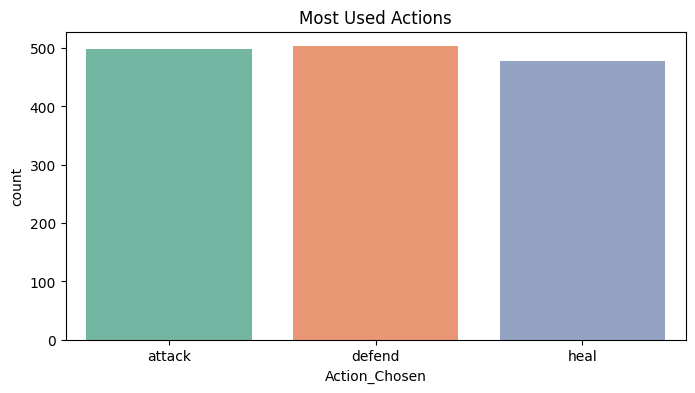

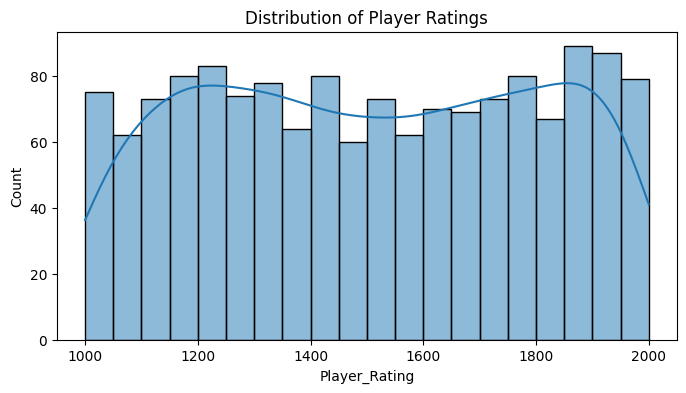

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Action_Chosen', palette='Set2')
plt.title('Most Used Actions')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Player_Rating', bins=20, kde=True)
plt.title('Distribution of Player Ratings')
plt.show()

In [7]:
features = ['Player_Level', 'Player_Rating', 'Action_Effectiveness', 'Used_Special_Move']
df['Used_Special_Move'] = df['Used_Special_Move'].astype(bool).astype(int)
df['Is_Win'] = df['Is_Win'].astype(bool).astype(int)

X = df[features]
y = df['Is_Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.78      0.67       169
           1       0.50      0.30      0.37       127

    accuracy                           0.57       296
   macro avg       0.55      0.54      0.52       296
weighted avg       0.55      0.57      0.55       296

Accuracy: 0.5709459459459459


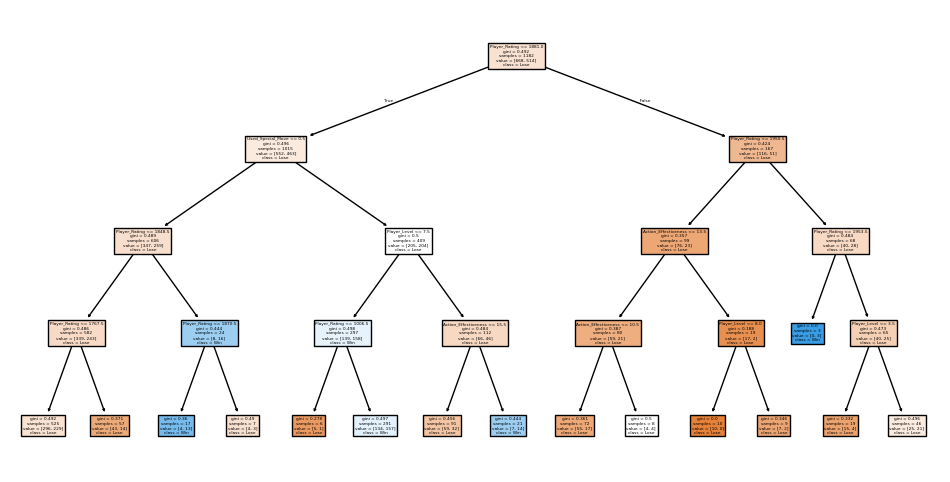

In [10]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=features, class_names=['Lose', 'Win'], filled=True)
plt.show()

In [21]:
!pip install streamlit -q
!pip install pyngrok -q

In [22]:
!ngrok config add-authtoken "1teqEyKWMhx3yoYqlJ9P3kfwDq0_75zkWrmrQuSASTyNLByQe"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

st.set_page_config(page_title="Hero Duel Game Analysis", layout="wide")
st.title("Hero Duel Game Data Analysis")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("File loaded successfully!")

    st.subheader("Raw Data")
    st.dataframe(df.head(10))

    st.subheader("Most Used Actions")
    fig1, ax1 = plt.subplots()
    sns.countplot(data=df, x="Action_Chosen", ax=ax1, palette="Set2")
    st.pyplot(fig1)

    st.subheader("Player Rating Distribution")
    fig2, ax2 = plt.subplots()
    sns.histplot(df['Player_Rating'], bins=20, kde=True, ax=ax2)
    st.pyplot(fig2)

    st.subheader("Win Rate by Player")
    win_counts = df[df['Is_Win'] == True]['Player_ID'].value_counts()
    fig3, ax3 = plt.subplots()
    win_counts.plot(kind='bar', color=['#3498db', '#2ecc71'], ax=ax3)
    ax3.set_title("Win Count by Player")
    st.pyplot(fig3)

    st.subheader("Decision Tree: Predicting Win")
    df['Used_Special_Move'] = df['Used_Special_Move'].astype(bool).astype(int)
    df['Is_Win'] = df['Is_Win'].astype(bool).astype(int)
    features = ['Player_Level', 'Player_Rating', 'Action_Effectiveness', 'Used_Special_Move']
    X = df[features]
    y = df['Is_Win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = DecisionTreeClassifier(max_depth=4)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    st.write(f"Model Accuracy: {accuracy:.2f}")

    fig4, ax4 = plt.subplots(figsize=(12, 6))
    plot_tree(model, feature_names=features, class_names=["Lose", "Win"], filled=True, ax=ax4)
    st.pyplot(fig4)

Overwriting app.py


In [24]:
!rm -rf /root/.ngrok2


In [25]:
!ngrok config add-authtoken "1teqEyKWMhx3yoYqlJ9P3kfwDq0_75zkWrmrQuSASTyNLByQe"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [27]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url)

!streamlit run app.py &> /dev/null &

ERROR:pyngrok.process.ngrok:t=2025-05-21T18:17:51+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-05-21T18:17:51+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.